# Context

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

df = pd.read_csv('../data/heart_cleveland_upload.csv')
palette = sns.color_palette("RdBu_r", 7)

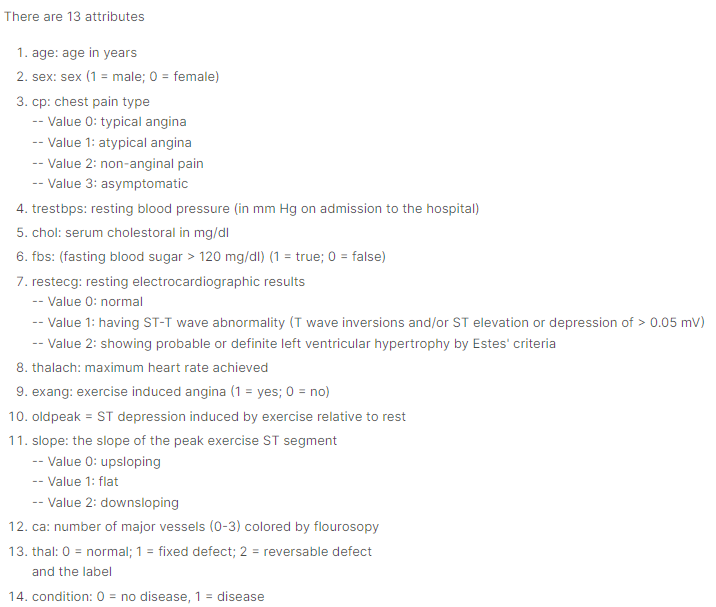

In [2]:
print('Rows and Columns in train dataset:', df.shape)

Rows and Columns in train dataset: (297, 14)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [4]:
display(df.describe())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [5]:
df.condition.value_counts()

0    160
1    137
Name: condition, dtype: int64

In [6]:
print('The number of unique values in columns in train dataset')
for col in df.columns:
    print(f'{col}: {len(pd.unique(df[col]))}')

The number of unique values in columns in train dataset
age: 41
sex: 2
cp: 4
trestbps: 50
chol: 152
fbs: 2
restecg: 3
thalach: 91
exang: 2
oldpeak: 40
slope: 3
ca: 4
thal: 3
condition: 2


**First conclusions:**  
46.1% people are sick. The data set is balanced, the features have already been converted to the required data type. They are all formally numerical, all categorical features are already converted for us.
- Numerical features: age, oldpeak, trestbps, thalach, chol;
- Categorical features: sex, restecg, slope, fbs, cp, exang, thal, ca.

# Data quality assessment

## Duplicates

In [7]:
# There are no duplicates
len(df) - len(df.drop_duplicates())

0

## Missing values

In [8]:
print('Missing values per columns in train dataset')
for col in df.columns:
    print(f'{col}: {df[col].isnull().sum()}')

Missing values per columns in train dataset
age: 0
sex: 0
cp: 0
trestbps: 0
chol: 0
fbs: 0
restecg: 0
thalach: 0
exang: 0
oldpeak: 0
slope: 0
ca: 0
thal: 0
condition: 0


**Conclusion:** There are no omissions and duplicates in the data.

# Data exploration

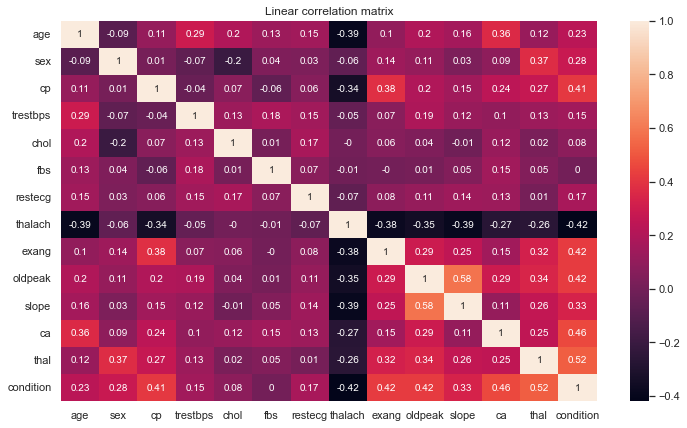

In [9]:
def corr_matrix(df):
    corr_mat = df.corr().round(2)
    f, ax = plt.subplots(figsize=(12,7))
    sns.heatmap(corr_mat, annot=True)
    ax.set_title('Linear correlation matrix')
    
corr_matrix(df)

**Conclusion** Variable has a relatively broad range of correlated features:  
- Amongst the higher positively correlated features: thal, ca, oldpeak, exang, cp;  
- Only one feature is negatively correlated to the target variable thalach;
- The only feature that has little to no linear correlation to target variable fbs.

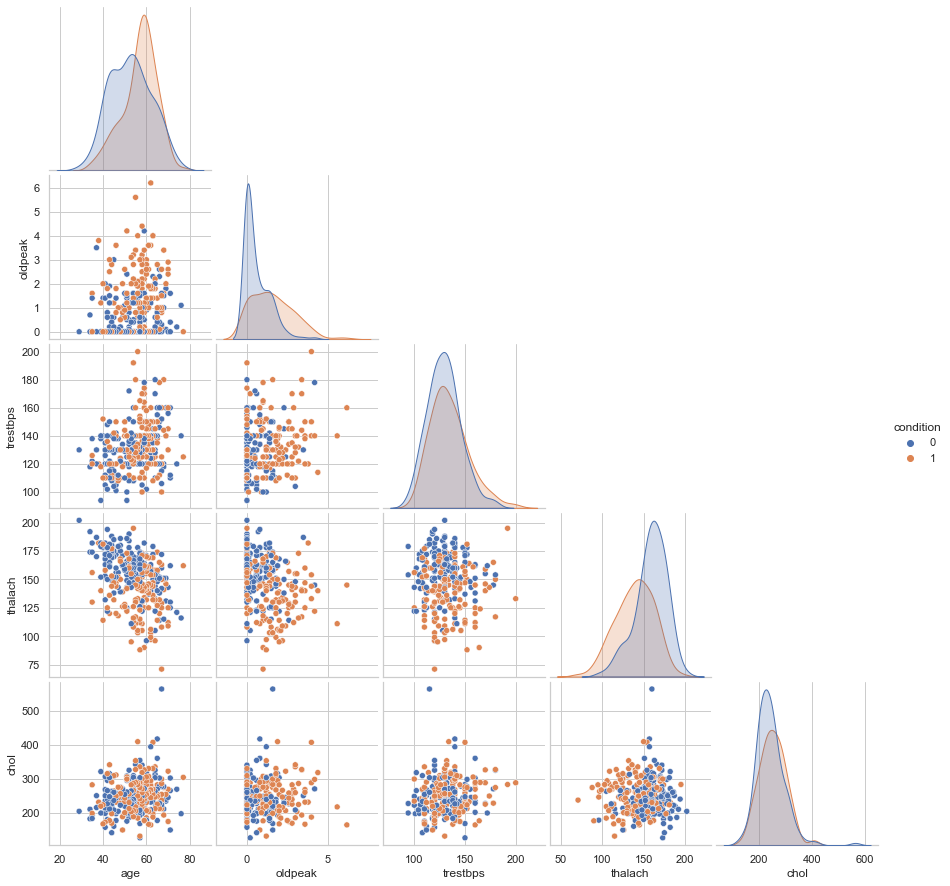

In [18]:
sns.pairplot(df[[ 'age', 'oldpeak', 'trestbps', 'thalach', 'chol', 'condition']], hue="condition", corner=True);

**Conclusion** For oldpeak, thalac, age, there are clearly noticeable differences in the distributions of these signs for people with and without the disease. chol and trestbps look quite similar in distribution. The age group is not really a factor in elevated old peak.

In [10]:
def plot_count(x, xlabel):
    plt.figure(figsize=(20, 2))
    sns.countplot(x=x, hue='condition', data=df, palette=palette)
    plt.legend(["no disease", "disease"], loc='upper right')
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.show()
    
def plot_count_order(x, xlabel, order):
    plt.figure(figsize=(20, 2))
    sns.countplot(x=x, hue='condition', data=df, order=order, palette=palette)
    plt.legend(["no disease", "disease"], loc='upper right')
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.show()

def plot_count_2(x1, x2, xlabel1, xlabel2, rat, ind1=None, ind2=None):
    fig, ax = plt.subplots(1, 2, figsize=(20, 3), gridspec_kw={'width_ratios': rat})

    sns.countplot(x=x1, hue='condition', data=df,order=ind1, ax=ax[0], palette=palette)
    ax[0].legend(["no disease", "disease"], loc='upper right')
    ax[0].set_xlabel(xlabel1)
    ax[0].set_ylabel('Frequency')

    sns.countplot(x=x2, hue='condition', data=df, order=ind2, ax=ax[1], palette=palette)
    ax[1].legend(["no disease", "disease"])
    ax[1].set_xlabel(xlabel2)
    ax[1].set_ylabel('Frequency')
    plt.show()
    
def plot_count_n(lst_name, lst_label, n_plots):
    idx = -1
    fig, ax = plt.subplots(1, n_plots, figsize=(20, 3))
    for i in range(0, n_plots):
        idx += 1
        id1 = lst_name[idx]
        id2 = lst_label[idx]
        sns.countplot(x=id1, hue='condition', data=df, ax=ax[idx], palette=palette)
        ax[idx].legend(["no disease", "disease"], loc='upper right')
        ax[idx].set_xlabel(id2)
        ax[idx].set_ylabel('Frequency')

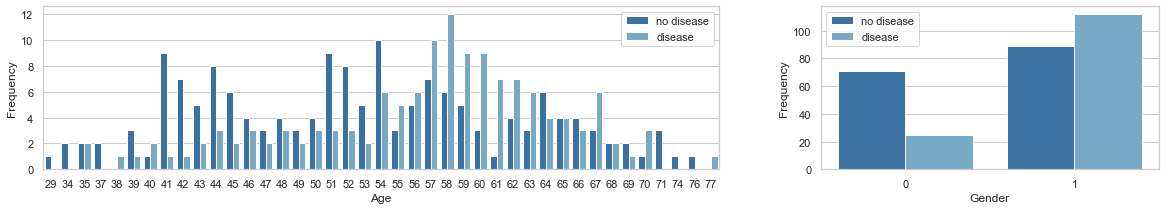

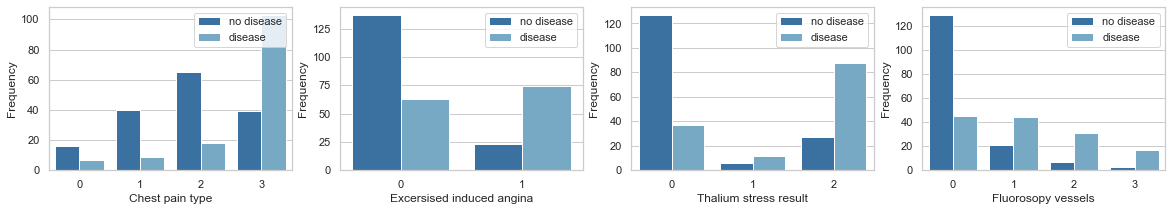

In [11]:
plot_count_2('age', 'sex', 'Age', 'Gender', [2, 1])
plot_count_n(
    ['cp', 'exang', 'thal', 'ca'],
    ['Chest pain type', 'Excersised induced angina', 'Thalium stress result', 'Fluorosopy vessels'],
    4
)

**Conclusion**  
- *age:* The group between 29 and 54 is less susceptible to heart disease. The same cannot be said about the group of patients aged between 55 and 63. The older age group is patients with a higher risk of heart disease.  
- *sex:* Men are more likely to have the disease. Women are less susceptible to heart disease.  
- *cp:* Patients with the disease do not actually have symptoms of chest pain.  
- *exang:* Higher exchange values are associated with higher condition values.  
- *thal:* For people with heart diseases, a reversable defect is characteristic, for healthy people - normal.
- *ca:* Higher values of colored large vessels are associated with the target variable.

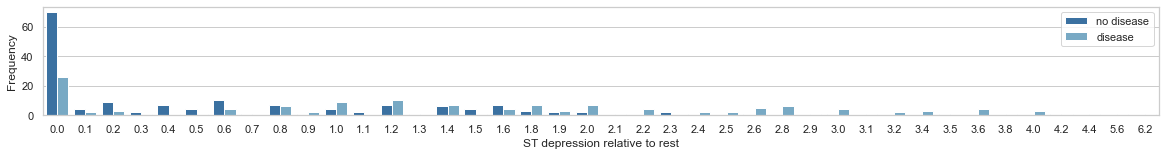

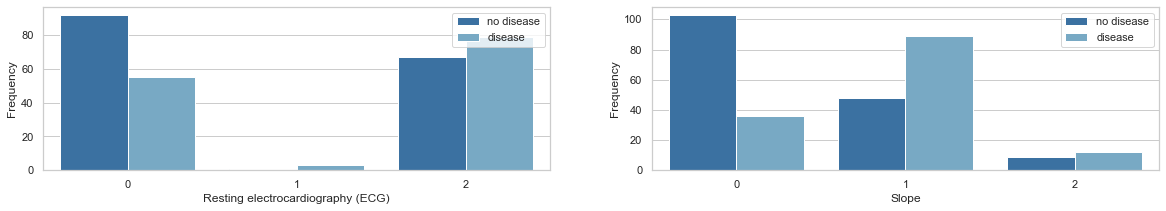

In [12]:
plot_count('oldpeak', 'ST depression relative to rest')
plot_count_2('restecg', 'slope', 'Resting electrocardiography (ECG)', 'Slope', [1, 1])

**Conclusion**  
- *oldpeak:* High values are typical for people with heart disease, especially for a situation when the value is greater than 2. 
- *restecg:* In most healthy patients, OES is normal, but a significant proportion of patients with the disease also have probable/definite hypertrophy of the left ventricle. However, a significant part of patients with the disease also have normal SEZ, a larger number of them is associated with a more likely/definite result of left ventricular hypertropia.

- *slope:* The ascent is usually characteristic of patients without the disease. Gentle slopes are more common in patients with the disease. Very few variations of variation exist for a downward slope.

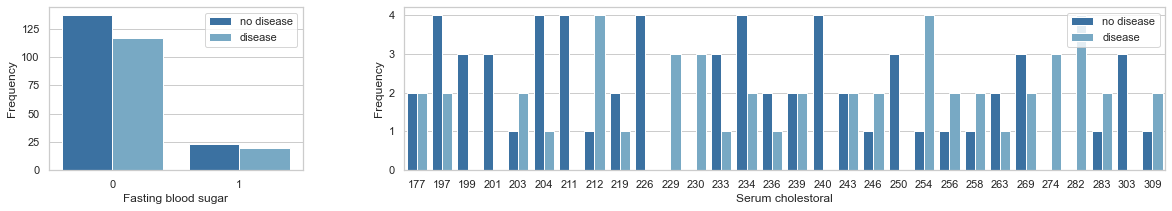

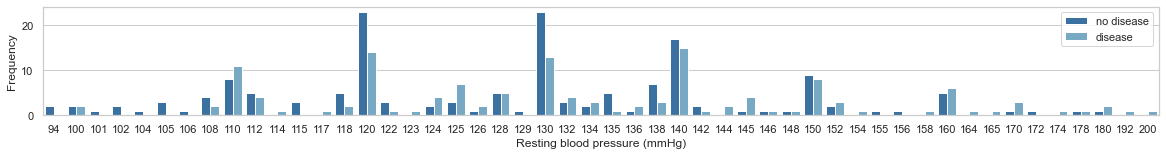

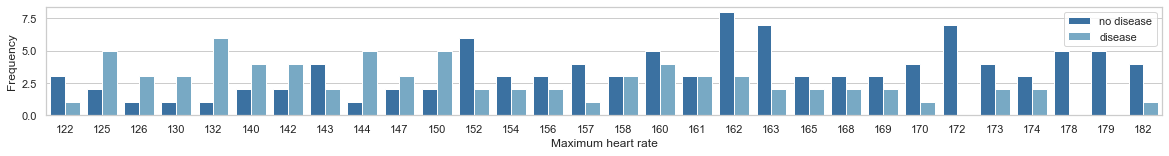

In [13]:
CNT = 30
plot_count_2(
    'fbs', 
    'chol', 
    'Fasting blood sugar', 
    'Serum cholestoral', 
    [3, 9], 
    None, 
    df['chol'].value_counts().iloc[:CNT].index.sort_values())
plot_count('trestbps', 'Resting blood pressure (mmHg)')
plot_count_order('thalach', 'Maximum heart rate', df['thalach'].value_counts().iloc[:CNT].index.sort_values())

**Conclusion**  
- *fbs:* In most patients, fbs is below 120, but apparently a value above 120 is irrelevant to the state of health.
- *chol:* A wide range of cholesterol values is measured in the range from 126 to 564. The most common values almost all exceed 200, which is associated with an increased value.
- *trestbps:* peaks are characteristic for the range 110 - 160, which is associated with normative values. Lower blood pressure in the range is usually characteristic of patients without heart disease. Higher values are typical for people with the disease.
- *thalach:* oddly enough, higher maximum values of heart rate are typical for people without diseases. Thus, for people with diseases, there are more cases with lower maximum heart rate values, this histogram shows cases with a higher frequency.